### Comparison with Count-based Language Models
- NNLM
> **Represent words as dense vectors in $R^n$ (word embedding).**  
  $W_t ∈ R^{|V|}$ : One-hot representation of word $V$ at time $t$   
  ⇒ $x_t = Xw_t$ : Word embedding $(X ∈ R^{n×|V|}, n < |V|)$   

  > **Train a neural net that composes history to predict next word.**  
     $$p(w_t = j|w_1, ..., w_{t-1}) = \frac{exp(p^j · g(x_1, ..., x_{t-1}) + q^j)}{\sum_{j′∈V}{exp(p^j′ · g(x_1, ..., x_{t-1}) + q^j′)}} = softmax(Pg(x_1, ... , x_{t-1})+q)$$   

  > $ P^j ∈ R^m , q^j ∈ R$ : Output word embedding/bias for word $j ∈ V$  
  g : Composition function

### Learning NNLM 

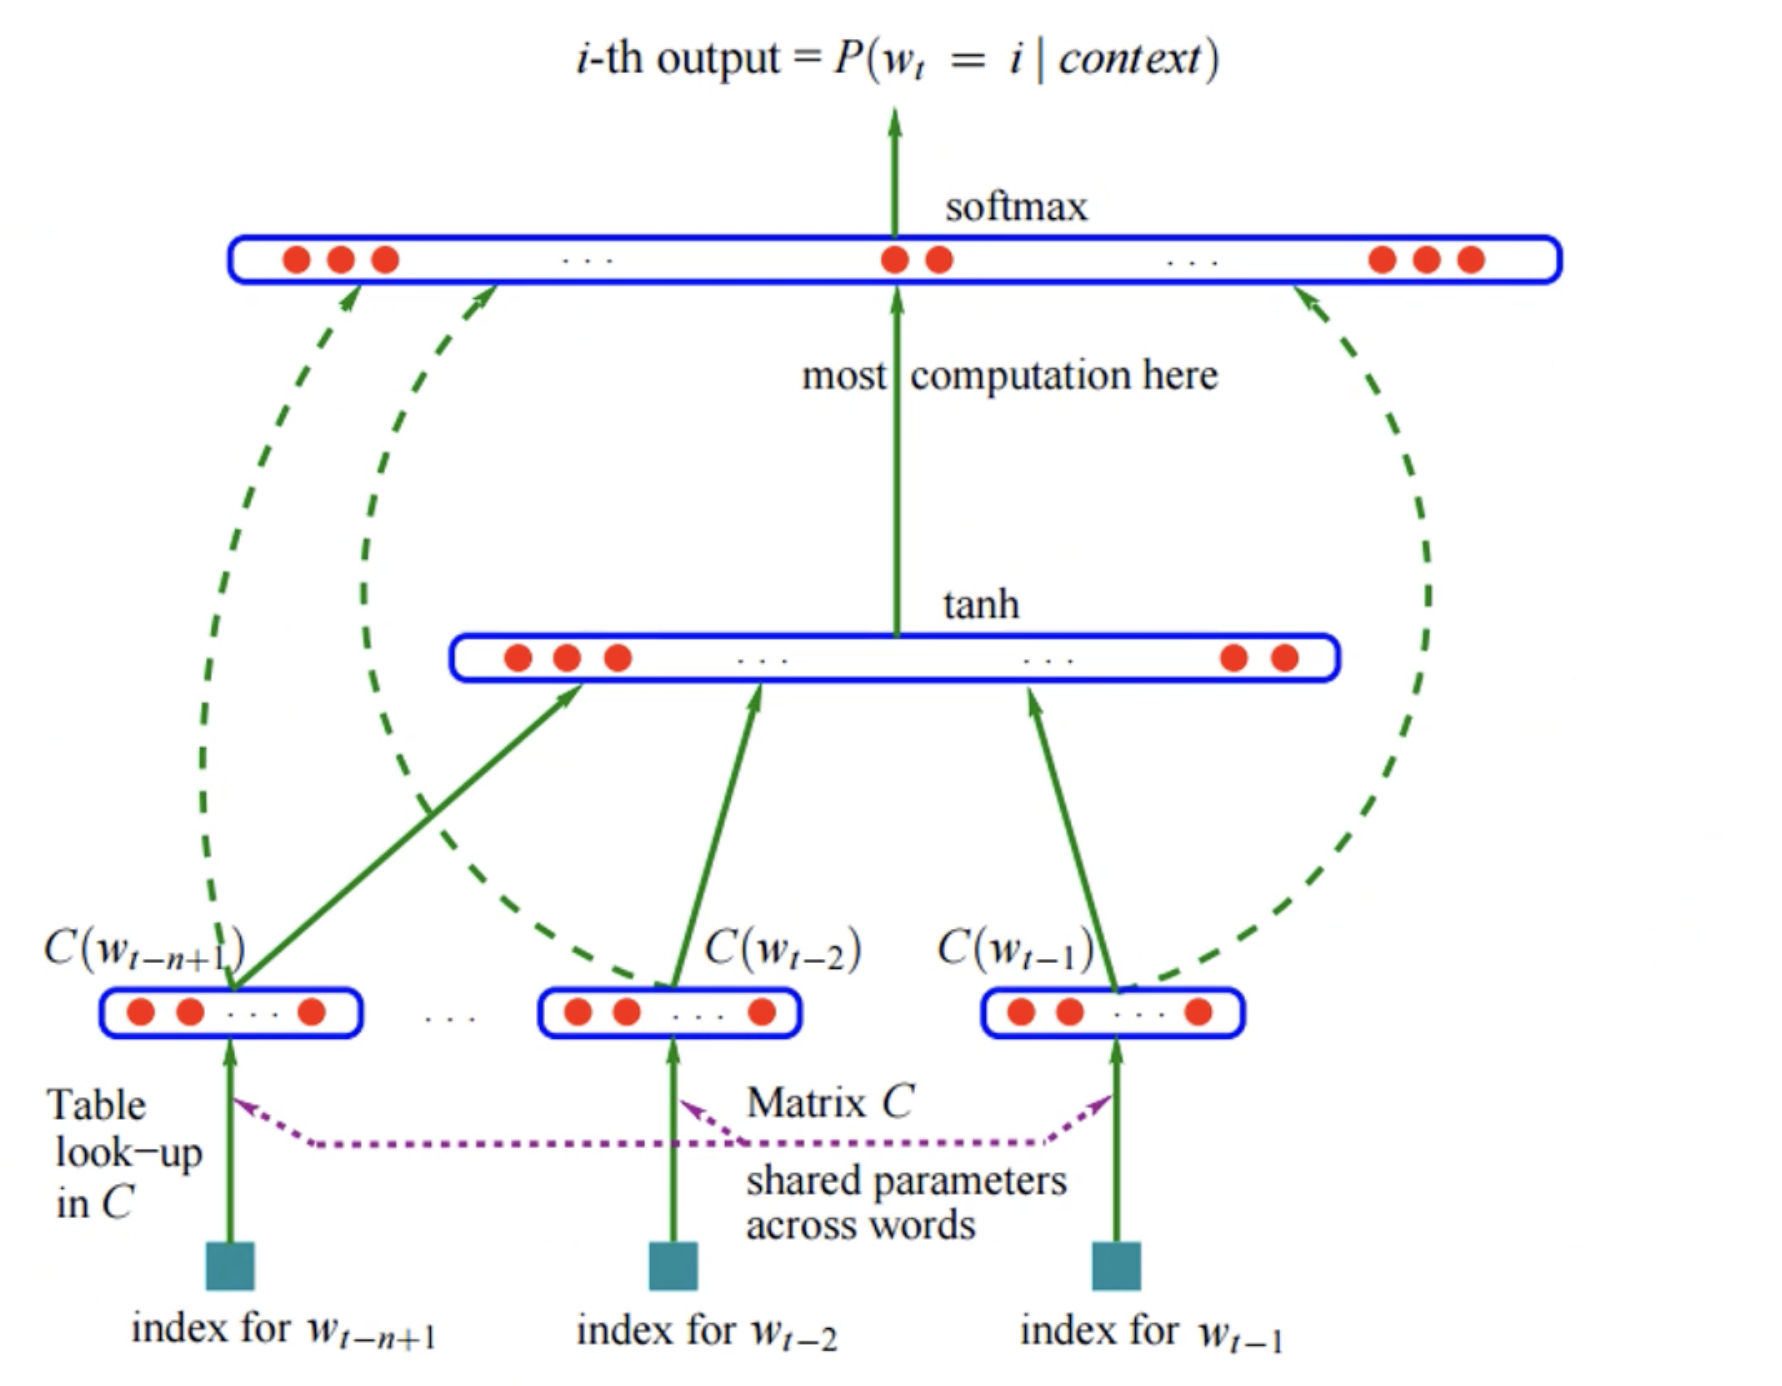

- The objective is to learn a good model $ f(w_t, ... , w_{t-n+1}) = \hat{p}$, in the sense that it gives high out-of-sample likelihood  

- Two constraints
    - For any choice of $w_1^{t-1}, \sum_{i=1}^{|V|} f(i, w_{t-1} ⋯ w_{t-n+1})$ = 1 (어떤 조건에서도 이후 단어들이 생성될 확률의 총 합은 1)  
    - f ≥ 0 (각 단어가 생성될 확률은 0보다 크거나 같아야 함) 

- Decompose the function $f(w_t, ⋯ w_{t-n+1} = \hat{P}(w_t|w_1^{t-1})$ in two parts:  
   - A mapping C, a.k.a the <u>lookup table</u>, from any element $i$ of $V$ to a real vector $C(i) ∈ R^m$ , it represents the distributed feature vectors associated with each word in the vocabulary. $C$ is represented by a $|V| × m$ matrix of free parameters

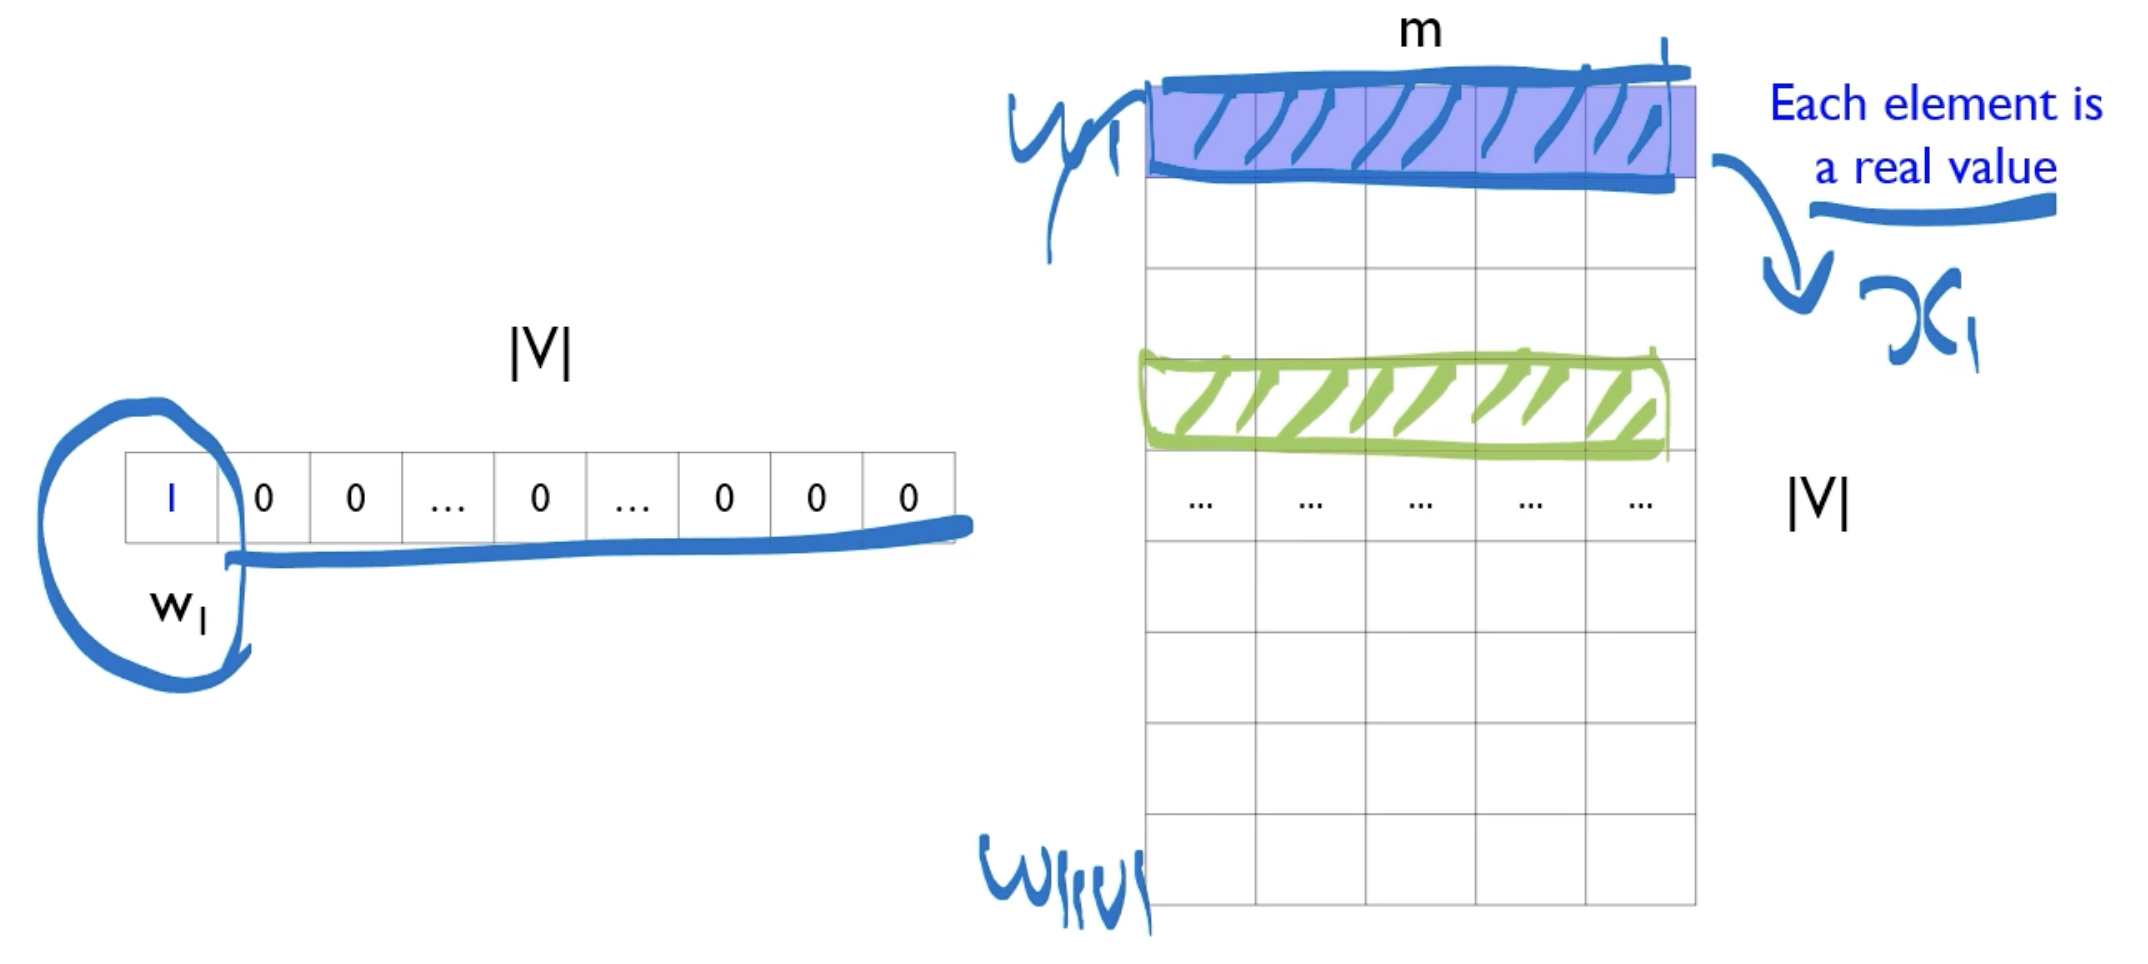

부연) C라는 mapping은 논문에서 lookup table이라고 부르는데 우리가 알고있는 word vector들을 전부 쌓아놓은 것입니다.   

위 그림은 lookup table이 무슨 역할을 하는지에 대한 설명입니다.  
만약에 첫번째 단어인 w1에 대해서 lookup table이 무슨 역할을 하는지 물어본다면, 보시다시피 one-hot representations가 1에서 lookup table로 넘어가면 보라색에 해당하는 m차원의 vector가 w1이 주어졌을 때 꺼내서 쓰게되는 x1입니다. 그리고 각각의 elements들은 실수값(real value)을 가질 수 있습니다.   
몇 번째 단어에 대한 임베딩을 쓰고 싶다면 그 해당하는 low(초록색)를 끄집어 낸다라고 생각하면 될 것 같습니다.

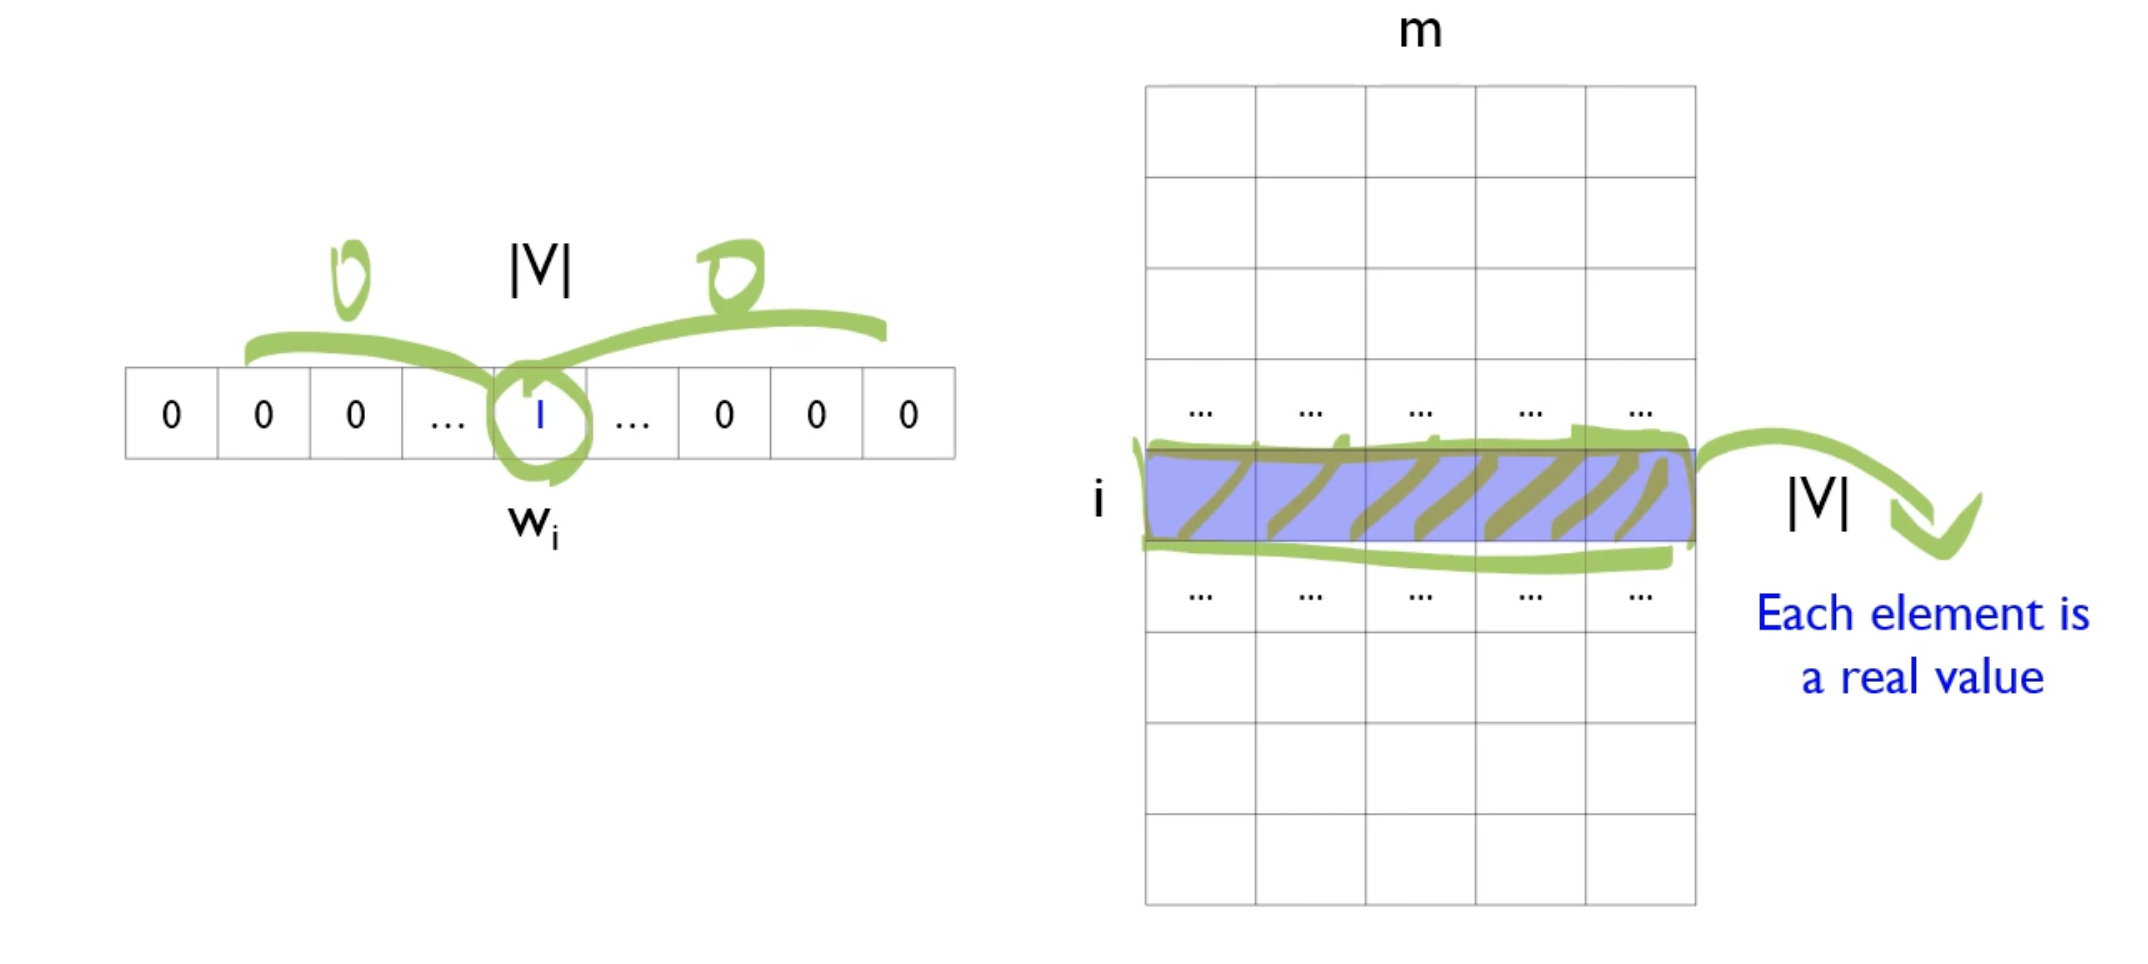

부연) 두번째 예시도 마찬가지입니다. 이번에는 i번째 단어를 사용해서 vocabulary를 쓰고 싶다고 한다면 i라는 인덱스에 해당하는 것만 1의 값을 갖고, 나머지는 전부 0의 값을 갖습니다. 이걸 C에서 가지고 오면 i번째 해당하는 low(보라색)를 그대로 끄집어 온다라고 생각하시면 됩니다.